# TD3
---
In this notebook, we train TD3 with OpenAI Gym's Bipedalwalker-v3 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

from TD3_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env = gym.make('BipedalWalker-v3')
env.seed(2)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], seed=2)

In [3]:
print('action space size : {}'.format(env.action_space))
print('observation space size : {}'.format(env.observation_space))

action space size : Box(4,)
observation space size : Box(24,)


### 3. Train the Agent with TD3

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [4]:
### A RANDOM AGENT
state = env.reset()
score = 0
t = 0
while True:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    env.render()
    state = next_state
    score+=reward
    t+=1
    if done:
        break
print(score)
print('Time step ',t)
env.close()

-74.14033864074291
Time step  1600


Episode 100	Average Score: -92.90
Episode 200	Average Score: -104.31
Episode 300	Average Score: -75.26
Episode 400	Average Score: -43.65
Episode 500	Average Score: -25.67
Episode 600	Average Score: -13.59
Episode 700	Average Score: -14.42
Episode 800	Average Score: 52.08
Episode 900	Average Score: 85.65
Episode 1000	Average Score: -108.01
Episode 1100	Average Score: -25.27
Episode 1200	Average Score: -115.96
Episode 1300	Average Score: -112.89
Episode 1400	Average Score: -116.99
Episode 1500	Average Score: -117.32
Episode 1600	Average Score: -32.07
Episode 1700	Average Score: 101.85
Episode 1800	Average Score: 155.81
Episode 1900	Average Score: 200.11
Episode 2000	Average Score: 211.47
Episode 2100	Average Score: 236.63
Episode 2200	Average Score: 248.70
Episode 2300	Average Score: 229.69
Episode 2400	Average Score: 267.73
Episode 2500	Average Score: 280.03
Episode 2595	Average Score: 300.01	Score: 306.91	Time steps :1294517

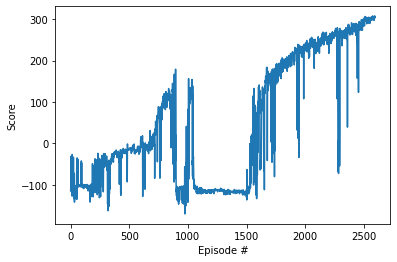

In [5]:
def TD3(n_episodes=10000, max_t=700, up_t = 1, start_steps = 10000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    steps = 0
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            if(steps<=start_steps):
                action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)
            if ((t+1)%up_t==0):
                agent.step(state, action, reward, next_state, done, t, update=True)
            else :
                agent.step(state, action, reward, next_state, done, t)
            state = next_state
            score += reward
            steps += 1
            if done:
                break

        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tTime steps :{}'.format(i_episode, np.mean(scores_deque), score, steps), end="")
        torch.save(agent.actor_local.state_dict(), 'weights/checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'weights/checkpoint_critic.pth')
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=300:
            break   
    return scores

scores = TD3()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [12]:
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
env = gym.wrappers.Monitor(gym.make('BipedalWalker-v3'), './video/',video_callable=lambda episode_id: True,force = True)
state = env.reset()
agent.reset()
score = 0
while True:
    action = agent.act(state, add_noise= False)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    score+=reward
    if done:
        break

print(score)
env.close()

307.3187834599016
